In [123]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout

In [124]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return (1 - SS_res/(SS_tot + K.epsilon()))

#### Load datasets

In [125]:
training_set = pd.read_csv("training_set.csv", index_col=0)
training_set

,latitude,longitude,price,beds,bath,square,year,Residential,Condominium
0,50.476003,-104.646174,299900,3.0,1.0,948,1961.0,1.0,0.0
1,50.423583,-104.512040,359900,3.0,3.0,1160,2019.0,1.0,0.0
2,50.463622,-104.652170,189900,2.0,1.0,748,1953.0,1.0,0.0
3,50.403865,-104.609861,439900,3.0,3.0,1174,1959.0,1.0,0.0
4,50.446873,-104.608262,289900,2.0,2.0,1098,2009.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
575,50.401995,-104.615987,359900,3.0,2.0,1224,1959.0,1.0,0.0
576,50.461896,-104.633760,89900,2.0,1.0,900,1946.0,1.0,0.0
577,50.500928,-104.643219,419900,3.0,3.0,1428,2008.0,1.0,0.0
578,50.489515,-104.608653,299900,4.0,2.0,980,1970.0,1.0,0.0


#### Preprocess the data

In [126]:
# Turn into an array
train_set = training_set.to_numpy()

In [127]:
# scale
scaler = MinMaxScaler()
train_set = scaler.fit_transform(train_set)
train_set

array([[0.71404005, 0.28105625, 0.17778481, ..., 0.46956522, 1.        ,
        0.        ],
       [0.23594896, 0.95879007, 0.21575949, ..., 0.97391304, 1.        ,
        0.        ],
       [0.6011187 , 0.25075929, 0.10816456, ..., 0.4       , 1.        ,
        0.        ],
       ...,
       [0.94136526, 0.29598434, 0.25373418, ..., 0.87826087, 1.        ,
        0.        ],
       [0.83727606, 0.47063582, 0.17778481, ..., 0.54782609, 1.        ,
        0.        ],
       [0.16990986, 0.53046519, 0.19044304, ..., 0.44347826, 1.        ,
        0.        ]])

In [128]:
# Create X & y
y = train_set[:,2]
print(y.shape)
X = np.delete(train_set, 2, axis=1)
#X = train_set[:,5]
print(X.shape)

(580,)
(580, 8)


In [129]:
print(X)

[[0.71404005 0.28105625 0.4        ... 0.46956522 1.         0.        ]
 [0.23594896 0.95879007 0.4        ... 0.97391304 1.         0.        ]
 [0.6011187  0.25075929 0.2        ... 0.4        1.         0.        ]
 ...
 [0.94136526 0.29598434 0.4        ... 0.87826087 1.         0.        ]
 [0.83727606 0.47063582 0.6        ... 0.54782609 1.         0.        ]
 [0.16990986 0.53046519 0.4        ... 0.44347826 1.         0.        ]]


In [130]:
# make test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)

(464, 8)


In [152]:
def get_model(): 
    # Create Neural Net
    model = Sequential()
    # input is two features and we have 4 nodes in the first layer, using the tanh activation
    model.add(Dense(64, input_shape=(8,), activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(1))
    
    return model

#### train model 

In [159]:
model = get_model()

# I am using the adam optimizer to optimize gradient descent, mean squared error for loss
model.compile(Adam(learning_rate=0.001), loss='mse', metrics=["mse", r_square])

# add early stopping callback to prevent from overfitting
early_stopping_callback = EarlyStopping(monitor="mse", patience=20, mode='min', restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=200, batch_size = 16,
                    shuffle=True, validation_split=0.2, callbacks = [early_stopping_callback])

Epoch 1/200
24/24 [==============================] - 1s 14ms/step - loss: 0.0116 - mse: 0.0116 - r_square: 0.0486 - val_loss: 0.0086 - val_mse: 0.0086 - val_r_square: 0.5283
Epoch 2/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0063 - mse: 0.0063 - r_square: -0.0763 - val_loss: 0.0125 - val_mse: 0.0125 - val_r_square: 0.0789
Epoch 3/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0059 - mse: 0.0059 - r_square: 0.4806 - val_loss: 0.0095 - val_mse: 0.0095 - val_r_square: 0.4311
Epoch 4/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0050 - mse: 0.0050 - r_square: 0.5264 - val_loss: 0.0088 - val_mse: 0.0088 - val_r_square: 0.3797
Epoch 5/200
24/24 [==============================] - 0s 8ms/step - loss: 0.0053 - mse: 0.0053 - r_square: 0.5651 - val_loss: 0.0065 - val_mse: 0.0065 - val_r_square: 0.6230
Epoch 6/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0049 - mse: 0.0049 - r_square: 0.5434 - val_loss: 0.0077 -

24/24 [==============================] - 0s 8ms/step - loss: 0.0023 - mse: 0.0023 - r_square: 0.7938 - val_loss: 0.0043 - val_mse: 0.0043 - val_r_square: 0.6783
Epoch 49/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0021 - mse: 0.0021 - r_square: 0.7945 - val_loss: 0.0063 - val_mse: 0.0063 - val_r_square: 0.6317
Epoch 50/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0024 - mse: 0.0024 - r_square: 0.8036 - val_loss: 0.0035 - val_mse: 0.0035 - val_r_square: 0.6847
Epoch 51/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0018 - mse: 0.0018 - r_square: 0.7679 - val_loss: 0.0031 - val_mse: 0.0031 - val_r_square: 0.6505
Epoch 52/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0022 - mse: 0.0022 - r_square: 0.8069 - val_loss: 0.0030 - val_mse: 0.0030 - val_r_square: 0.7318
Epoch 53/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0014 - mse: 0.0014 - r_square: 0.8623 - val_loss: 0.0024 - val_mse:

24/24 [==============================] - 0s 8ms/step - loss: 0.0012 - mse: 0.0012 - r_square: 0.8796 - val_loss: 0.0021 - val_mse: 0.0021 - val_r_square: 0.7477
Epoch 96/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010 - r_square: 0.9017 - val_loss: 0.0023 - val_mse: 0.0023 - val_r_square: 0.7520
Epoch 97/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010 - r_square: 0.8892 - val_loss: 0.0029 - val_mse: 0.0029 - val_r_square: 0.7073
Epoch 98/200
24/24 [==============================] - 0s 7ms/step - loss: 0.0010 - mse: 0.0010 - r_square: 0.8753 - val_loss: 0.0021 - val_mse: 0.0021 - val_r_square: 0.7681


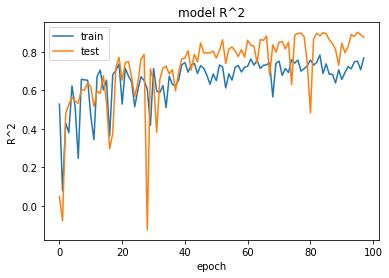

In [160]:
# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(history.history['val_r_square'])
plt.plot(history.history['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

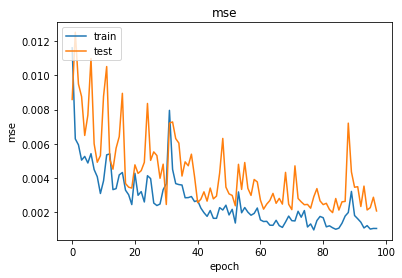

In [161]:
# plot training curve for mse
plt.plot(history.history['mse'])
plt.plot(history.history['val_mse'])
plt.title('mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [162]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [163]:
from sklearn.metrics import mean_squared_error as mse

In [164]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8266477720666786